# 5. Teoría Moderna de Portafolios

La Teoría Moderna de Portafolios (TMP), desarrollada por Harry Markowitz en la década de 1950, es el pilar de las finanzas cuantitativas modernas y de la gestión de inversiones institucionales.
Su propósito central es maximizar el rendimiento esperado de una cartera para un nivel de riesgo dado, o minimizar el riesgo para un nivel de rendimiento deseado.

## Construcción de un portfolio *equally weighted*

Un portfolio *equally weighted* consiste en invertir el mismo porcentaje del dinero asignado en cada uno de los activos del portfolio, esto es, $w_i = 1/n$, donde $n$ corresponde a la cantidad de activos en el portfolio. Para este ejemplo, construiremos un portfolio con 5 acciones: *TSLA*, *IBM*, *AAPL*, *NVDA*, *INTC*.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

activos = ["TSLA", "IBM", "AAPL", "NVDA", "INTC"]
n = len(activos)

precios = yf.download(activos, start = "2024-01-01", end = "2024-12-31", auto_adjust=True, multi_level_index=False)
precios.head()

[*********************100%***********************]  5 of 5 completed


Price            Close                                                \
Ticker            AAPL         IBM       INTC       NVDA        TSLA   
Date                                                                   
2024-01-02  184.081528  152.777466  47.168278  48.143856  248.419998   
2024-01-03  182.703156  151.453094  46.428196  47.545158  238.449997   
2024-01-04  180.382828  152.172043  46.250572  47.973946  237.929993   
2024-01-05  179.658951  150.563858  46.270309  49.072392  237.490005   
2024-01-08  184.002167  152.436920  47.809692  52.226814  240.449997   

Price             High                                                ...  \
Ticker            AAPL         IBM       INTC       NVDA        TSLA  ...   
Date                                                                  ...   
2024-01-02  186.858024  154.470782  48.727398  49.270290  251.250000  ...   
2024-01-03  184.319476  152.995049  47.178154  48.159848  245.679993  ...   
2024-01-04  181.552914  153.070731  46.536741  48.475693  242.699997  ...   
2024-01-05  181.225688  151.878784  47.197889  49.522167  240.119995  ...   
2024-01-08  184.041839  152.512601  48.115593  52.248806  241.250000  ...   

Price             Open                                                \
Ticker            AAPL         IBM       INTC       NVDA        TSLA   
Date                                                                   
2024-01-02  185.578846  154.035635  48.549777  49.219317  250.080002   
2024-01-03  182.673409  152.304480  46.477534  47.461201  244.979996   
2024-01-04  180.620803  151.566609  45.115773  47.743059  239.250000   
2024-01-05  180.462163  151.273351  46.408459  48.437711  236.860001   
2024-01-08  180.561297  150.119246  46.447929  49.487190  236.139999   

Price         Volume                                           
Ticker          AAPL      IBM      INTC       NVDA       TSLA  
Date                                                           
2024-01-02  82488700  3825000  45905700  411254000  104654200  
2024-01-03  58414500  4086100  35858400  320896000  121082600  
2024-01-04  71983600  3212000  47797800  306535000  102629300  
2024-01-05  62379700  4199400  34344000  415039000   92488900  
2024-01-08  59144500  3321700  42135100  642510000   85166600  

[5 rows x 25 columns]

<Axes: title={'center': 'Stocks en 2024'}, xlabel='Date'>

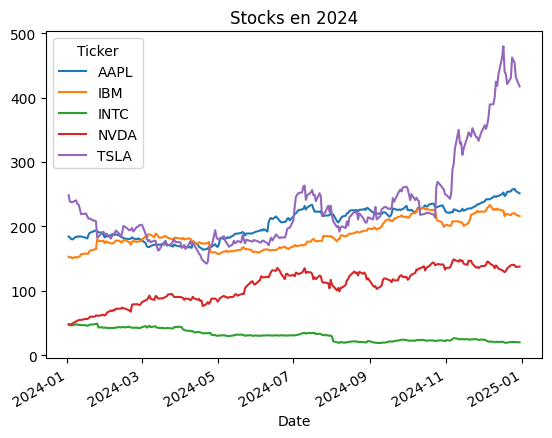

In [2]:
precios["Close"].plot(title="Stocks en 2024")

Calculamos retornos simples

In [3]:
retornos = precios["Close"].pct_change().dropna()
retornos.head()

Ticker,AAPL,IBM,INTC,NVDA,TSLA
Date,,,,,
2024-01-03,-0.007488,-0.008669,-0.015690,-0.012436,-0.040134
2024-01-04,-0.012700,0.004747,-0.003826,0.009019,-0.002181
2024-01-05,-0.004013,-0.010568,0.000427,0.022897,-0.001849
2024-01-08,0.024175,0.012440,0.033269,0.064281,0.012464
2024-01-09,-0.002263,-0.006578,-0.008256,0.016975,-0.022832


Luego, deberemos definir una lista donde cada componente sea igual a $1/n = 1/5 = 0.2$. Para ello usamos la siguiente sintaxis: `n * [1/n]`

In [4]:
pesos = n * [1/n]
pesos

[0.2, 0.2, 0.2, 0.2, 0.2]

Ahora, lo que deberemos hacer es multiplicar la matriz de retornos por el vector de pesos para obtener la rentabilidad del portfolio, esto es:

$$r_{p,t} = \sum_{i=1}^n w_{i,t} \times r_{i,t}$$

Entonces, deberemos invertir la matriz de retornos usando el método `T`, y haciendo la sumaproducto. Esto último se hace con el método `dot` de Numpy. Finalmente, convertiremos el resultado en formato pandas para poder seguir trabajando con los resultados.


In [5]:
rp = pd.Series(np.dot(pesos, retornos.T), index=retornos.index)
rp.head()

,0
Date,
2024-01-03,-0.016883
2024-01-04,-0.000988
2024-01-05,0.001379
2024-01-08,0.029326
2024-01-09,-0.004591


Una librería útil para poder estudiar la rentabilidad de un portfolio es `quantstats`. Esta permite graficar el rendimiento de un activo o portfolio, pero también nos permite obtener métricas de rendimiento.

Una de las métricas mas relevantes de rendimiento de portafolios es el Sharpe Ratio.

$$ S = \frac{E[R_p] - R_f}{\sigma_p} $$

El Sharpe Ratio mide cuánto retorno excedente (sobre la tasa libre de riesgo) genera una inversión por unidad de riesgo asumido.

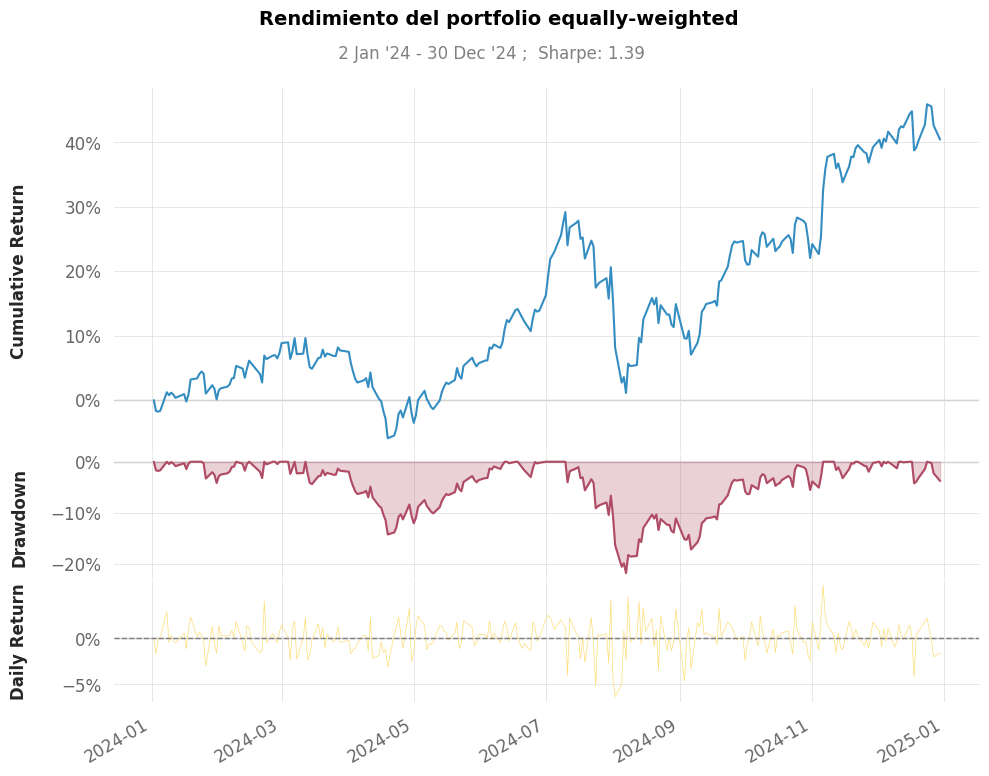

In [6]:
!pip install quantstats --quiet

import quantstats as qs

qs.plots.snapshot(rp, title = "Rendimiento del portfolio equally-weighted")

Para obtener métricas se debe utilizar el método `reports.metrics`. En él se debe especificar:
* benchmark: El benchmark a utilizar. Puede ser una Serie de Pandas o un ticker (lo descarga desde Yahoo! Finance, por lo que se debe llamar a la librería `yfinance`)
* rf: Retorno del activo libre de riesgo. En este caso usaré los bonos a 10 años plazo.
* mode: puede ser "basic" o "full".


In [7]:
# tasa libre de riesgo
rf = round(0.04/252, 5)
rf

0.00016

In [8]:
qs.reports.metrics(rp, benchmark = "^GSPC", rf = rf, mode = "basic")

                     Benchmark (^GSPC)    Strategy
-------------------  -------------------  ----------
Start Period         2024-01-03           2024-01-03
End Period           2024-12-30           2024-12-30
Risk-Free Rate       0.02%                0.02%
Time in Market       100.0%               100.0%

Cumulative Return    25.55%               42.86%
CAGR﹪               25.78%               43.26%

Sharpe               1.88                 1.46
Prob. Sharpe Ratio   96.45%               92.28%
Sortino              2.72                 2.11
Sortino/√2           1.92                 1.5
Omega                1.28                 1.28

Max Drawdown         -8.49%               -21.73%
Max DD Date          2024-08-05           2024-08-07
Max DD Period Start  2024-07-17           2024-07-11
Max DD Period End    2024-09-18           2024-11-05
Longest DD Days      64                   118

Gain/Pain Ratio      0.38                 0.28
Gain/Pain (1M)       3.3                  2.62

Payoff

Usando el método `reports.html` se puede crear un reporte en formato html con los gráficos y métricas para analizar al portfolio.

In [9]:
qs.reports.html(rp, benchmark = "^GSPC", rf = rf, title = "Rendimiento del portfolio equally-weighted", download_filename = "reporte.html", output = "reporte.html")

## Frontera eficiente

La *Frontera eficiente* corresponde a las mejores combinaciones de **riesgo** y **retorno** de un conjunto de activos. Para conocer esta frontera, se debe resolver el siguiente problema:

$$\min W' \Sigma W $$
$$s.a. E(r_p) = W \times E(r_i)$$
$$ W'\mathbf{1} = 1 $$
$$ W \gt 0 $$

En otras palabras, la frontera eficiente son las mejores combinaciones de riesgo-retorno que podemos encontrar con $n$ activos. Para construirla debemos resolver este problema de optimización dado los distintos retornos esperados que necesitemos. Una forma sencilla de realizarlo es a través del módulo `optimize`de `scipy`.

In [10]:
import numpy as np
import scipy.optimize as sco

Dado que este es un proceso iterativo, deberemos construir algunas funciones:

In [11]:
# obtener el retorno del portafolio
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

# obtener la volatilidad del portafolio
def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [12]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):

    efficient_portfolios = []

    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]

    for ret in rtns_range:
        constr = (
            {"type": "eq",
             "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},
            {"type": "eq",
             "fun": lambda x: np.sum(x) - 1}
        )
        ef_portf = sco.minimize(get_portf_vol,
                                initial_guess,
                                args=args, method="SLSQP",
                                constraints=constr,
                                bounds=bounds)
        efficient_portfolios.append(ef_portf)

    return efficient_portfolios

Para este ejemplo asumiremos que el retorno esperado es igual al retorno promedio histórico. Este es un **pésimo supuesto**, dado que estamos considerando que el pasado es igual al futuro. Dado que tenemos datos diarios, lo anualizaremos multiplicándolos por 252 días. A su vez, calcularemos la matriz de covarianza de forma análoga.

In [13]:
avg_returns = retornos.mean() * 252
cov_mat = retornos.cov() * 252

Definiremos distintos valores objetivo de retorno esperado:

In [14]:
rtns_range = np.linspace(0.1, 0.55, 200)

Luego, correremos el proceso de optimización:

In [15]:
efficient_portfolios = get_efficient_frontier(avg_returns,
                                              cov_mat,
                                              rtns_range)

In [16]:
efficient_portfolios[0]

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.20276939215206774
           x: [ 4.289e-01  3.367e-01  2.344e-01  0.000e+00  1.494e-16]
         nit: 5
         jac: [ 1.458e-01  1.369e-01  4.017e-01  1.947e-01  2.011e-01]
        nfev: 30
        njev: 5
 multipliers: [-2.385e-01  2.266e-01]

Rescataremos las varianzas del portfolio desde el proceso de optimización:

In [17]:
vols_range = [x["fun"] for x in efficient_portfolios]

Finalmente, graficamos:

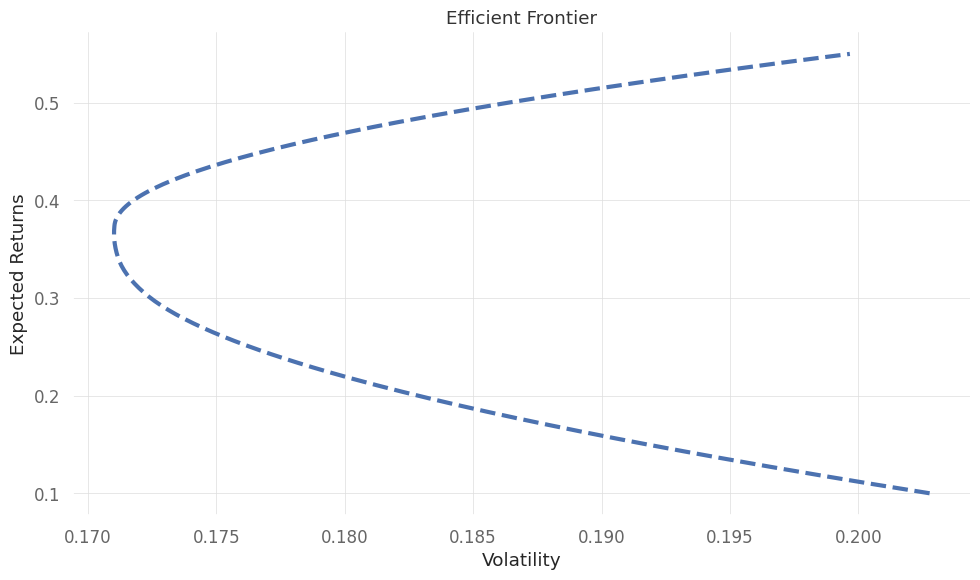

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.plot(vols_range, rtns_range, "b--", linewidth=3)
ax.set(xlabel="Volatility",
        ylabel="Expected Returns",
        title="Efficient Frontier")

sns.despine()
plt.tight_layout()

¿Por qué la frontera eficiente tiene esta forma? Calculemos portfolios aleatorios para incorporarlos al gráfico:

In [19]:
np.random.seed(123)
weights = np.random.random(size=(10**5, n))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

Y en base a ellos, calculemos retorno esperado, varianza, y ratio de Sharpe:

In [20]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)

portf_sharpe_ratio = (portf_rtns - rf*252) / portf_vol

portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)

portf_results_df

,returns,volatility,sharpe_ratio
0,0.546424,0.294402,1.719094
1,0.292889,0.249217,1.013447
2,0.216913,0.245357,0.719739
3,0.559964,0.284317,1.827688
4,0.354165,0.266988,1.175498
...,...,...,...
99995,0.334461,0.303220,0.970058
99996,0.273461,0.270039,0.863361
99997,0.521694,0.277988,1.731638
99998,0.643011,0.305072,1.975568


Ahora grafiquemos:

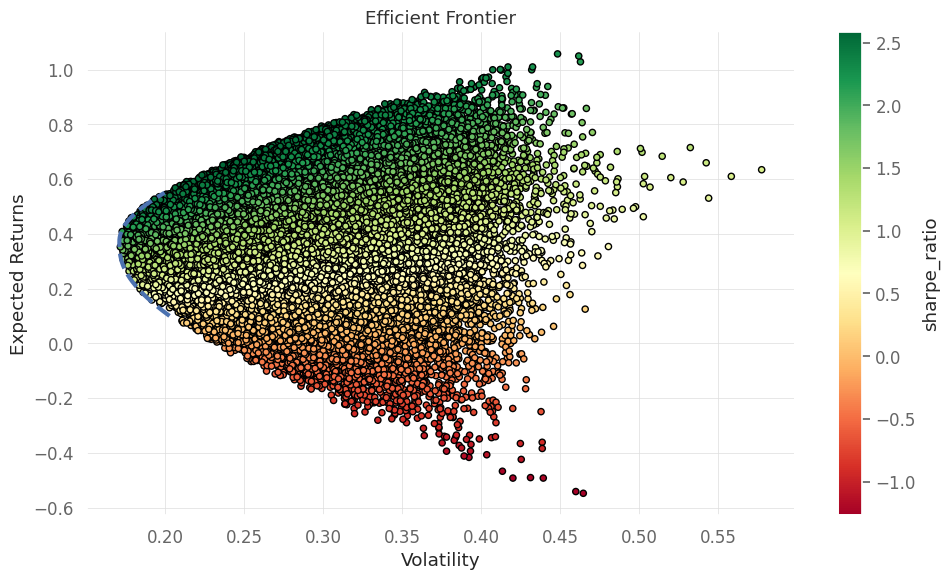

In [21]:
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
                      y="returns", c="sharpe_ratio",
                      cmap="RdYlGn", edgecolors="black",
                      ax=ax)
ax.plot(vols_range, rtns_range, "b--", linewidth=3)
ax.set(xlabel="Volatility",
        ylabel="Expected Returns",
        title="Efficient Frontier")

sns.despine()
plt.tight_layout()

Como se puede apreciar, todos los portfolios caen **por debajo de** la frontera eficiente.

Por otro lado, ¿cuál es el portfolio de mínima varianza?

In [35]:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]["fun"]
min_vol_W = efficient_portfolios[min_vol_ind]["x"]

min_vol_portf = {
    "W": min_vol_W,
    "Return": min_vol_portf_rtn,
    "Volatility": min_vol_portf_vol,
    "Sharpe Ratio": ((min_vol_portf_rtn - rf) / min_vol_portf_vol)
}

min_vol_portf

{'W': array([0.49843381, 0.47038095, 0.00442892, 0.01035853, 0.0163978 ]),
 'Return': np.float64(0.3668341708542714),
 'Volatility': np.float64(0.1710206200771919),
 'Sharpe Ratio': np.float64(2.144034857836261)}

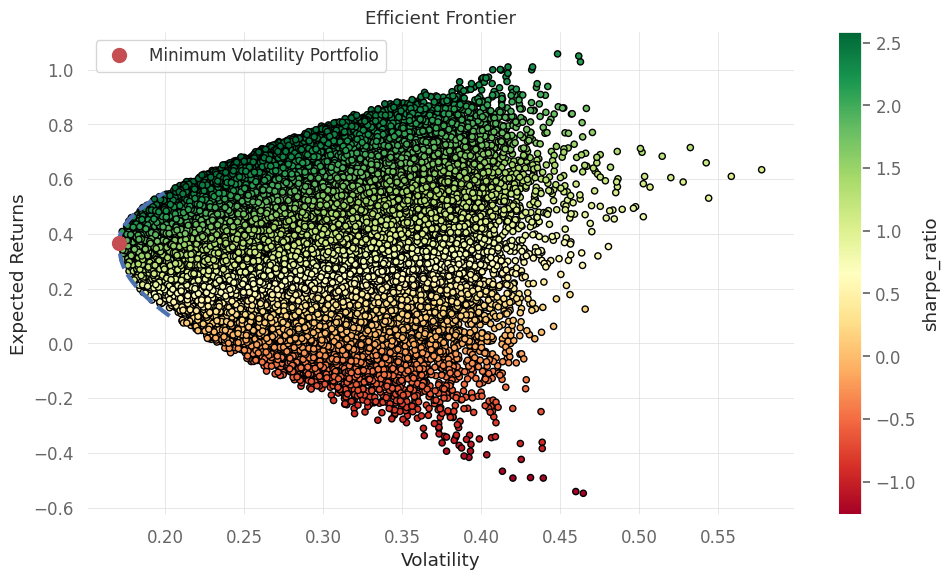

In [23]:
fig, ax = plt.subplots()
portf_results_df.plot(kind="scatter", x="volatility",
                      y="returns", c="sharpe_ratio",
                      cmap="RdYlGn", edgecolors="black",
                      ax=ax)
ax.plot(vols_range, rtns_range, "b--", linewidth=3)
ax.plot(min_vol_portf_vol, min_vol_portf_rtn, "ro", markersize=10, label="Minimum Volatility Portfolio")
ax.set(xlabel="Volatility",
        ylabel="Expected Returns",
        title="Efficient Frontier")
ax.legend()

sns.despine()
plt.tight_layout()